In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
inspector = sqlalchemy.inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
#dt.datetime.strptime(allprcp[i][1],'%Y-%m-%d').date()
lastdatum = engine.execute("select prcp, max(date) from measurement").fetchall()
lastdatum

[(0.0, '2017-08-23')]

In [16]:
lastday = lastdatum[0][1]
lastday

'2017-08-23'

In [61]:
# Calculate the date 1 year ago from the last data point in the database
lastday = allprcp[-1][1]
lastday

datetime.date(2017, 8, 23)

In [17]:
firstday = ( dt.datetime.strptime(lastday,'%Y-%m-%d').date() -  pd.DateOffset(years=1) ).date()
firstday

datetime.date(2016, 8, 23)

In [65]:
# Perform a query to retrieve the data and precipitation scores



[[0.0, datetime.date(2016, 1, 4)],
 [0.0, datetime.date(2016, 2, 3)],
 [0.03, datetime.date(2016, 2, 19)],
 [0.05, datetime.date(2016, 3, 16)],
 [0.09, datetime.date(2016, 3, 26)],
 [0.01, datetime.date(2016, 3, 30)],
 [0.01, datetime.date(2016, 4, 11)],
 [0.0, datetime.date(2016, 4, 15)],
 [0.0, datetime.date(2016, 4, 27)],
 [0.01, datetime.date(2016, 5, 3)],
 [0.03, datetime.date(2016, 5, 7)],
 [0.03, datetime.date(2016, 5, 21)],
 [0.0, datetime.date(2016, 5, 25)],
 [0.54, datetime.date(2016, 5, 29)],
 [0.0, datetime.date(2016, 6, 2)],
 [0.0, datetime.date(2016, 6, 6)],
 [0.05, datetime.date(2016, 6, 10)],
 [0.01, datetime.date(2016, 6, 20)],
 [0.01, datetime.date(2016, 6, 26)],
 [0.04, datetime.date(2016, 7, 4)],
 [0.0, datetime.date(2016, 7, 8)],
 [0.03, datetime.date(2016, 7, 16)],
 [0.02, datetime.date(2016, 7, 22)],
 [0.0, datetime.date(2016, 7, 26)],
 [0.08, datetime.date(2016, 8, 1)],
 [0.39, datetime.date(2016, 8, 7)],
 [0.0, datetime.date(2016, 8, 17)],
 [0.12, datetime.date

In [69]:
# Save the query results as a Pandas DataFrame and set the index to the date column


,Precipitation,Date
0,0.00,2016-01-04
1,0.00,2016-02-03
2,0.03,2016-02-19
3,0.05,2016-03-16
4,0.09,2016-03-26
...,...,...
2448,0.13,2017-08-17
2449,0.09,2017-08-19
2450,0.56,2017-08-21
2451,0.50,2017-08-22


In [71]:
# Sort the dataframe by date
#prcp_by_date = prcp_df.groupby('Date').mean()

,Precipitation,Date
0,0.00,2016-01-04
1,0.00,2016-02-03
2,0.03,2016-02-19
3,0.05,2016-03-16
4,0.09,2016-03-26
...,...,...
2448,0.13,2017-08-17
2449,0.09,2017-08-19
2450,0.56,2017-08-21
2451,0.50,2017-08-22


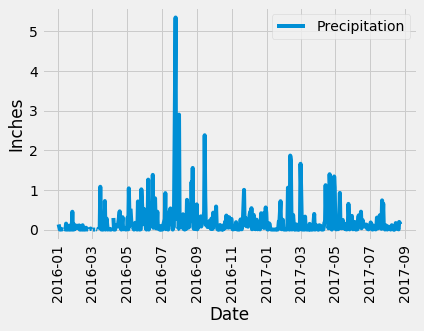

In [88]:
# Use Pandas Plotting with Matplotlib to plot the data
# prcp_by_date.plot()
# plt.xticks(rotation = 90)
# plt.ylabel('Inches')
# plt.show()

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [ ]:
# Design a query to show how many stations are available in this dataset?


In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
